#### 스팸 이메일 분류

In [24]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Import Libraries


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read Dataset


In [26]:
df=pd.read_csv("email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.isna().sum()

# 이 코드는 데이터프레임(df)의 각 열에 대해 결측값의 개수를 계산하여 반환
# 결과는 각 열에 대한 결측값의 총합
# 이 정보는 데이터의 결측값 패턴을 파악하거나 결측값을 처리하는 데 도움

Category    0
Message     0
dtype: int64

In [28]:
df.dropna(inplace=True)
df

# 데이터프레임(df)에서 결측값이 포함된 행을 삭제
# 변경된 데이터프레임이 다시 변수 df에 저장
# 이를 통해 결측값이 있는 행들이 제거되어 더 깔끔하고 처리하기 쉬운 데이터를 얻을 수 있음

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


## Find Duplicates values and drop and delete them (중복된 값 찾기 및 제거)

In [29]:
df.duplicated().sum()

# 데이터프레임(df)에서 중복된 행의 개수를 반환
# 이 정보를 통해 중복된 데이터의 양을 파악

415

In [30]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

# 데이터프레임(df)에서 중복된 행을 제거한 후, 제거된 데이터프레임에서 다시 중복된 행의 개수를 반환
# 이를 통해 중복 제거가 제대로 이루어졌는지 확인할 수 있음

0

In [31]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Divide the data in two parts - training >> 80% and testing >> 20%
#### 데이터를 훈련 및 테스트 세트로 나눔
#### 훈련 데이터는 전체 데이터의 80%를 포함하고, 테스트 데이터는 나머지 20%를 포함

In [32]:
from sklearn.model_selection import train_test_split # 데이터를 훈련 세트와 테스트 세트로 나누는 함수
from sklearn.feature_extraction.text import CountVectorizer # 텍스트 데이터를 특징 벡터로 변환하는 도구
import seaborn as sns # 시각화를 위한 라이브러리
%matplotlib inline
# 주피터 노트북 내에서 그래프를 표시하기 위한 명령어

In [33]:
# 'Message' 열을 특징(X)으로, 'Category' 열을 라벨(Y)로 사용하여 데이터를 훈련 세트와 테스트 세트로 나눔
# test_size=0.2는 전체 데이터 중 20%를 테스트 세트로 사용하겠다는 의미이며, random_state=42는 난수 발생 시드를 고정하여 재현성을 확보

x=df['Message'] # 특징(X)으로 사용할 열을 선택
y=df['Category'] # 라벨(Y)로 사용할 열을 선택
x_train, x_test,y_train, y_test = train_test_split(df["Message"],df["Category"],test_size = 0.2,random_state=42)

# train_test_split 함수를 사용하여 데이터를 훈련 세트와 테스트 세트로 나눔
# x_train, x_test: 특징(X)에 해당하는 훈련 세트와 테스트 세트
# y_train, y_test: 라벨(Y)에 해당하는 훈련 세트와 테스트 세트
# test_size=0.2: 테스트 세트의 크기를 전체 데이터의 20%로 지정
# random_state=42: 난수 발생 시드를 42로 고정하여 결과의 재현성을 확보

In [34]:
cv=CountVectorizer()
# CountVectorizer 객체를 생성

x_train_vectorized = cv.fit_transform(x_train)
# 훈련 데이터를 CountVectorizer를 사용하여 특징 벡터로 변환

x_test_vectorized = cv.transform(x_test)
# 테스트 데이터를 CountVectorizer를 사용하여 특징 벡터로 변환

print(x_test_vectorized)
# 변환된 테스트 데이터의 특징 벡터를 출력

# 이를 통해 훈련 데이터와 테스트 데이터가 단어의 등장 빈도를 기반으로 특징 벡터로 변환

  (0, 887)	1
  (0, 3208)	1
  (0, 4182)	1
  (0, 4852)	1
  (0, 5831)	1
  (0, 6023)	1
  (0, 6745)	1
  (1, 2126)	1
  (1, 3465)	1
  (1, 4140)	1
  (1, 4717)	1
  (1, 6876)	1
  (1, 7125)	1
  (1, 7574)	1
  (2, 1741)	1
  (2, 1837)	1
  (2, 2525)	1
  (2, 3243)	1
  (2, 4536)	1
  (2, 6633)	1
  (2, 6726)	1
  (3, 1526)	1
  (3, 3696)	1
  (3, 4331)	1
  (3, 4828)	1
  :	:
  (1030, 5871)	1
  (1030, 6015)	1
  (1030, 6712)	1
  (1030, 6713)	4
  (1030, 6835)	1
  (1030, 7107)	1
  (1030, 7293)	2
  (1030, 7610)	1
  (1031, 291)	1
  (1031, 509)	1
  (1031, 642)	1
  (1031, 1158)	1
  (1031, 1627)	2
  (1031, 2075)	1
  (1031, 3406)	1
  (1031, 3579)	1
  (1031, 3683)	1
  (1031, 4322)	1
  (1031, 4536)	1
  (1031, 4759)	1
  (1031, 4863)	1
  (1031, 5440)	1
  (1031, 5912)	1
  (1031, 6835)	2
  (1031, 7107)	2


# Using Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # 분류 모델의 평가 지표들
from sklearn.metrics import confusion_matrix # 오차 행렬(Confusion Matrix)


In [36]:
lg=LogisticRegression()
# LogisticRegression 객체를 생성
lg.fit(x_train_vectorized,y_train)
# LogisticRegression 모델을 x_train_vectorized와 y_train 데이터를 사용하여 훈련시킴

# 이를 통해 훈련된 로지스틱 회귀 모델은 주어진 특징 벡터에 대해 어떤 카테고리에 속할지를 예측할 수 있게 됨

LogisticRegression()

In [37]:
y_predect=lg.predict(x_test_vectorized)
# # 훈련된 로지스틱 회귀 모델을 사용하여 x_test_vectorized 데이터에 대한 예측을 수행

y_predect
# 예측 결과를 출력

#  y_predect에는 로지스틱 회귀 모델이 테스트 데이터에 대해 수행한 예측 결과가 저장되어 있음

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [38]:
# 실제 테스트 데이터의 라벨(y_test)과 모델이 예측한 결과(y_predect)를 비교하여 평가 지표들을 계산
accuracy = accuracy_score(y_test, y_predect) # 정확도
precision = precision_score(y_test, y_predect, pos_label='spam') # 정밀도
recall = recall_score(y_test, y_predect, pos_label='spam') # 재현율
f1 = f1_score(y_test, y_predect, pos_label='spam') # F1 점수

# 계산된 평가 지표들을 출력
print(f'Accuracy: {accuracy:.4f}') # 정확도 출력
print(f'Precision: {precision:.4f}') # 정밀도 출력
print(f'Recall: {recall:.4f}') # 재현율 출력
print(f'F1 score: {f1:.4f}') # F1 점수 출력


# 이러한 평가 지표들은 분류 모델의 성능을 측정하고, 각각의 측면에서 모델의 품질을 평가
# 결과는 소수점 네 자리까지 출력되며,
# 각 평가 지표의 해석은 그 값이 높을수록 모델의 성능이 더 우수하다는 것을 의미

Accuracy: 0.9787
Precision: 0.9754
Recall: 0.8623
F1 score: 0.9154


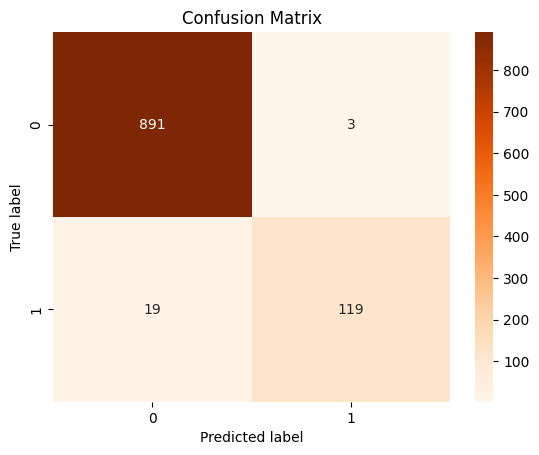

In [39]:
# 실제 테스트 데이터의 라벨(y_test)과 모델이 예측한 결과(y_predect)를 기반으로 오차 행렬을 계산
conf_matrix = confusion_matrix(y_test, y_predect)

# 오차 행렬을 히트맵으로 시각화
sns.heatmap(conf_matrix, annot=True, cmap="Oranges", fmt="d")

# 그래프에 축 레이블과 제목을 추가
plt.xlabel('Predicted label') # x 축 레이블 '예측된 라벨'
plt.ylabel('True label') # y 축 레이블 '실제 라벨'
plt.title('Confusion Matrix') # 그래프 제목 '오차 행렬'

plt.show()

# 이를 통해 오차 행렬을 시각화하여 모델이 어떤 클래스를 얼마나 정확히 예측했는지, 어떤 클래스를 잘못 예측했는지를 확인